In [3]:
!pip install seaborn


In [95]:
!pip install scipy

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn

In [8]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [9]:
df.shape

(1338, 7)

In [11]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

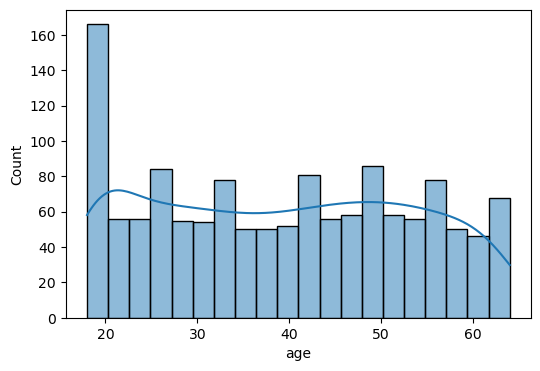

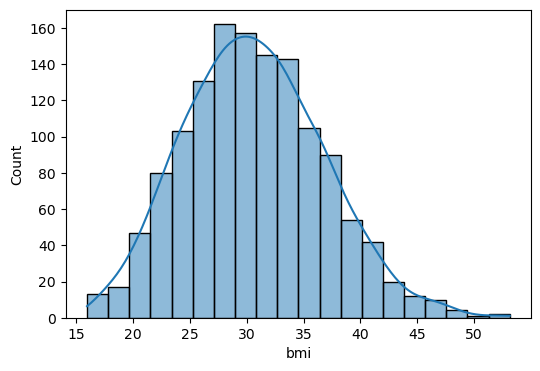

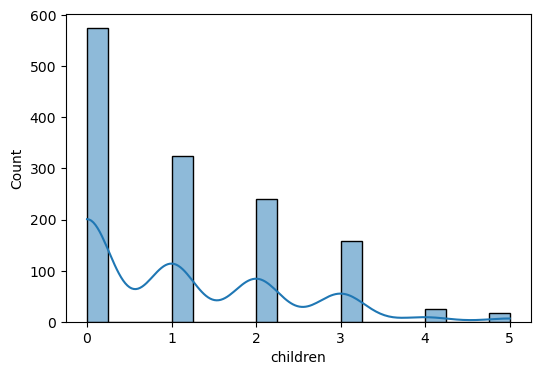

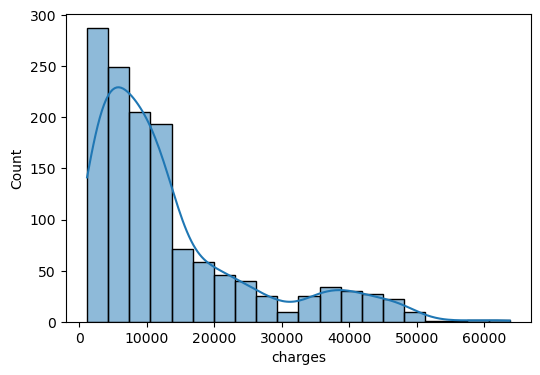

In [19]:
numeric_columns = ['age','bmi','children','charges']
for columns in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[columns],kde=True,bins=20)


<Axes: xlabel='children', ylabel='count'>

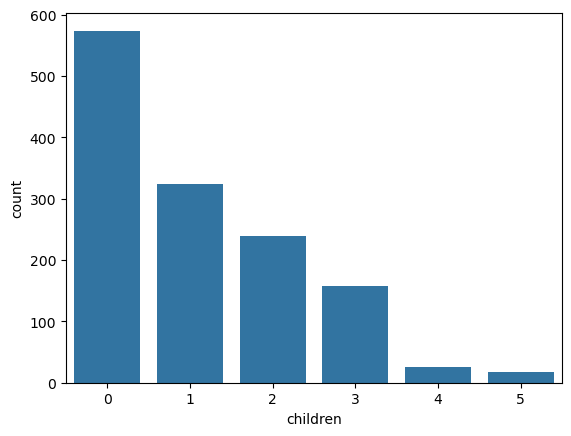

In [21]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

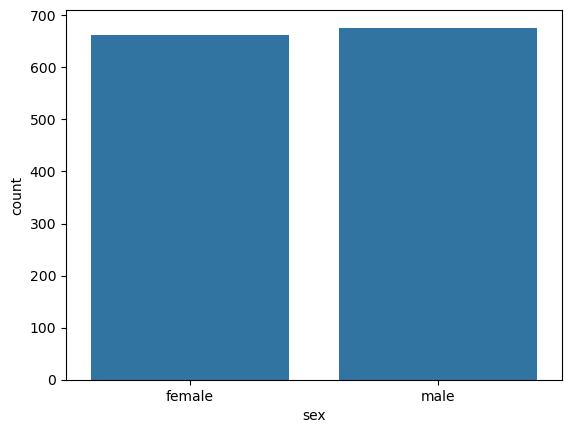

In [22]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

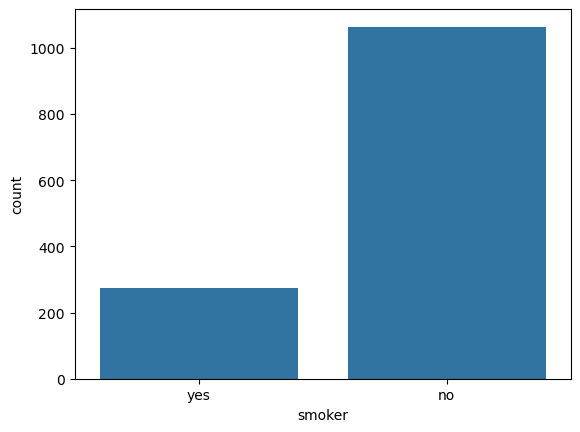

In [23]:
sns.countplot(x=df['smoker'])

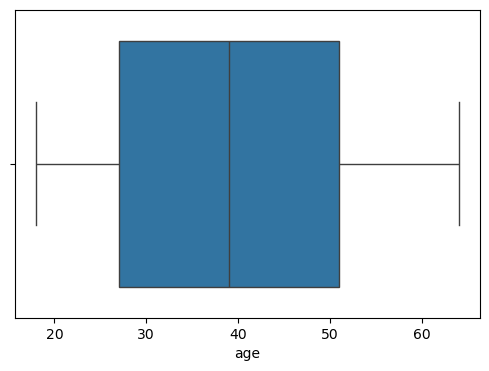

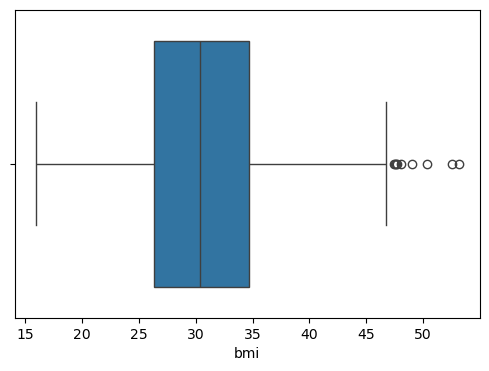

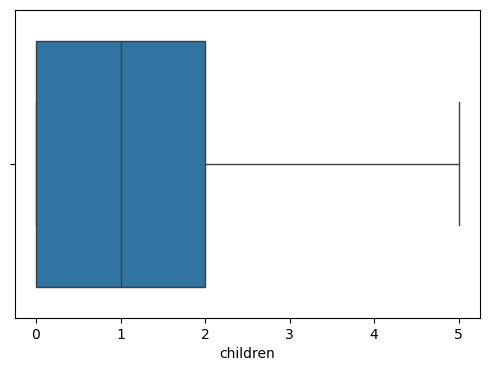

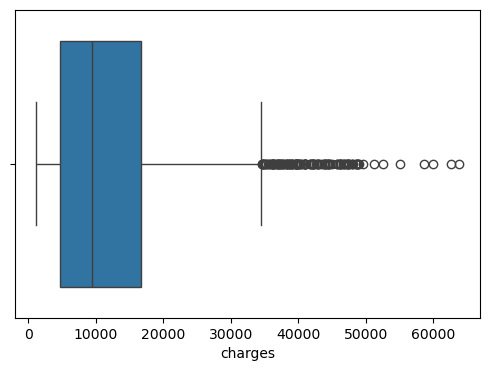

In [25]:
for cols in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = df[cols])

<Axes: >

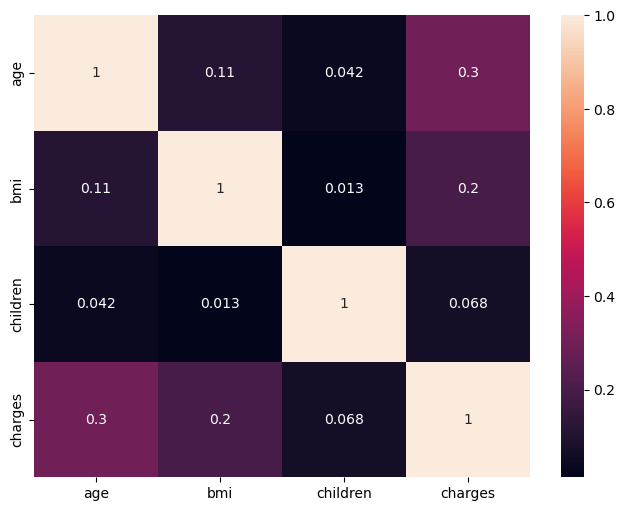

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing


In [45]:
df_clean = df.copy()

In [46]:
df_clean.drop_duplicates(inplace=True)

In [47]:
df_clean.shape

(1337, 7)

In [48]:
df_clean.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [49]:
df_clean['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [50]:
#Doing Label Coding - 
df_clean['sex'] = df_clean['sex'].map({'male':0,'female':1})
df_clean.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [51]:
df_clean['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [52]:
df_clean['smoker'] = df_clean['smoker'].map({'no':0,'yes':1})
df_clean.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [54]:
df_clean.rename(columns={'sex':'is_female','smoker':'is_smoker'},inplace=True)
df_clean

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [55]:
#One Hot Enoding 
df_clean['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [56]:
df_clean = pd.get_dummies(df_clean,columns=['region'],drop_first=True)

In [58]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [60]:
df_clean.shape

(1337, 9)

In [61]:
df_clean=df_clean.astype(int)

In [62]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

In [68]:
df_clean['bmi_category'] = np.nan

df_clean.loc[df['bmi']<18.5,'bmi_category']='underweight'
df_clean.loc[(df['bmi'] >=18.5) & (df['bmi'] < 25),'bmi_category'] = 'normal'
df_clean.loc[(df['bmi'] >= 25) & (df_clean['bmi'] < 30), 'bmi_category'] = 'overweight'
df_clean.loc[df['bmi'] >= 30,'bmi_category']='obese'

df_clean



C:\Users\hp\AppData\Local\Temp\ipykernel_4836\576667227.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'underweight' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df['bmi']<18.5,'bmi_category']='underweight'


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,normal
4,32,0,28,0,0,3866,1,0,0,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obese
1334,18,1,31,0,0,2205,0,0,0,obese
1335,18,1,36,0,0,1629,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,1,overweight


In [69]:
df_clean['age'].value_counts()

age
18    69
19    67
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

In [76]:
df_clean['age_standardization'] = np.nan

df_clean.loc[(df_clean['age'] > 15) & (df_clean['age'] <= 19),'age_standarization'] = 'adolescents'
df_clean.loc[(df_clean['age'] > 19) & (df_clean['age'] <= 24),'age_standarization'] = 'young_adults'
df_clean.loc[(df_clean['age'] > 24) & (df_clean['age'] <= 59),'age_standarization'] = 'adults'
df_clean.loc[df_clean['age'] > 59,'age_standarization']= 'older_adults'

df_clean.drop(columns=['age_standardization'],inplace=True)
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category,age_standarization
0,19,1,27,0,1,16884,0,0,1,overweight,adolescents
1,18,0,33,1,0,1725,0,1,0,obese,adolescents
2,28,0,33,3,0,4449,0,1,0,obese,adults
3,33,0,22,0,0,21984,1,0,0,normal,adults
4,32,0,28,0,0,3866,1,0,0,overweight,adults
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obese,adults
1334,18,1,31,0,0,2205,0,0,0,obese,adolescents
1335,18,1,36,0,0,1629,0,1,0,obese,adolescents
1336,21,1,25,0,0,2007,0,0,1,overweight,young_adults


In [77]:
df_clean['age_standarization'].value_counts()

age_standarization
adults          946
young_adults    141
adolescents     136
older_adults    114
Name: count, dtype: int64

In [84]:

df_clean = pd.get_dummies(df_clean,columns=['age_standarization'],drop_first=True)
df_clean = df_clean.astype(int)

In [85]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_obese,bmi_category_overweight,bmi_category_underweight,age_standarization_adults,age_standarization_older_adults,age_standarization_young_adults
0,19,1,27,0,1,16884,0,0,1,0,1,0,0,0,0
1,18,0,33,1,0,1725,0,1,0,1,0,0,0,0,0
2,28,0,33,3,0,4449,0,1,0,1,0,0,1,0,0
3,33,0,22,0,0,21984,1,0,0,0,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,1,0,0,1,0,0
1334,18,1,31,0,0,2205,0,0,0,1,0,0,0,0,0
1335,18,1,36,0,0,1629,0,1,0,1,0,0,0,0,0
1336,21,1,25,0,0,2007,0,0,1,0,1,0,0,0,1


In [87]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_obese', 'bmi_category_overweight',
       'bmi_category_underweight', 'age_standarization_adults',
       'age_standarization_older_adults', 'age_standarization_young_adults'],
      dtype='object')

In [92]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()
df_clean[cols] = scaler.fit_transform(df_clean[cols])
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_obese,bmi_category_overweight,bmi_category_underweight,age_standarization_adults,age_standarization_older_adults,age_standarization_young_adults
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,0,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,1,0,0,0,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,1,0,0,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,1,0,0,1,0,0
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,1,0,0,0,0,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,1,0,0,0,0,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0,0,0,1


<Axes: >

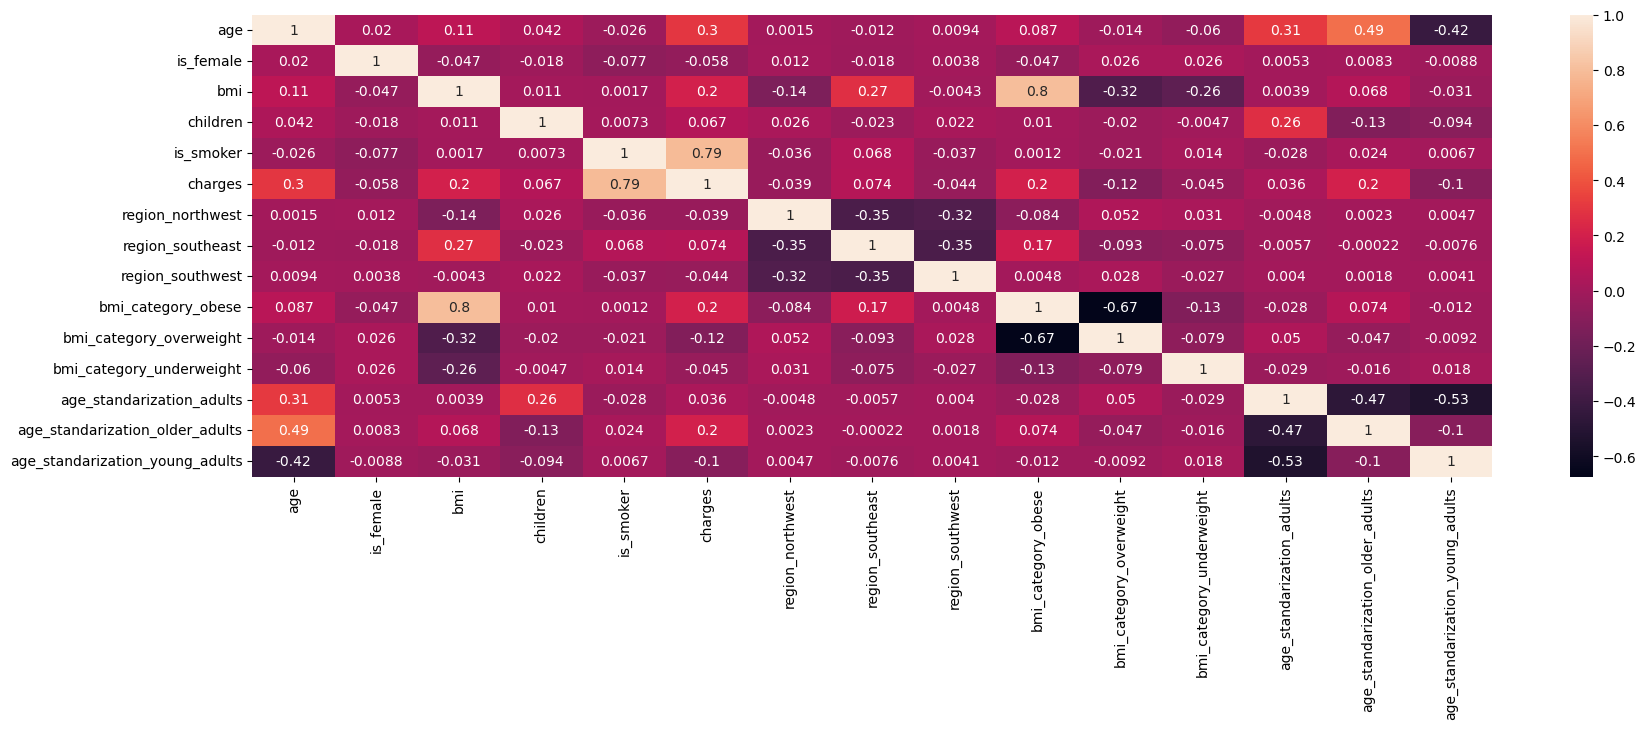

In [97]:
#Taking the one having highest correlation with charges (the target)
plt.figure(figsize=(20,6))
sns.heatmap(df_clean.corr(numeric_only=True),annot=True)


In [100]:
df_clean.corr(numeric_only=True)['charges'].sort_values()


bmi_category_overweight           -0.120601
age_standarization_young_adults   -0.104401
is_female                         -0.058046
bmi_category_underweight          -0.045064
region_southwest                  -0.043637
region_northwest                  -0.038695
age_standarization_adults          0.036177
children                           0.067390
region_southeast                   0.073577
bmi                                0.196236
bmi_category_obese                 0.200348
age_standarization_older_adults    0.200975
age                                0.298309
is_smoker                          0.787234
charges                            1.000000
Name: charges, dtype: float64

is_smoker has the highest 

In [101]:
cat_features = ['is_smoker','is_female','bmi_category_obese','bmi_category_underweight','bmi_category_overweight','region_southwest',
                'region_northwest','region_southeast','age_standarization_older_adults']

In [108]:
from scipy.stats import chi2_contingency

alpha = 0.05
rows = []

for feature in cat_features:
    contingency_table = pd.crosstab(
        df_clean[feature],
        df_clean['charges_category']
    )

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    rows.append({
        'Feature': feature,
        'Chi_Square': chi2,
        'p_value': p_value,
        'Recommendation': 'KEEP' if p_value < alpha else 'DROP'
    })

chi_square_df = pd.DataFrame(rows)
chi_square_df.sort_values('p_value')


,Feature,Chi_Square,p_value,Recommendation
0,is_smoker,342.629622,1.706837e-76,KEEP
8,age_standarization_older_adults,122.634421,1.676624e-28,KEEP
2,bmi_category_obese,7.968654,4.759432e-03,KEEP
4,bmi_category_overweight,3.002406,8.314098e-02,DROP
5,region_southwest,1.009277,3.150761e-01,DROP
6,region_northwest,0.312431,5.761923e-01,DROP
7,region_southeast,0.084377,7.714507e-01,DROP
3,bmi_category_underweight,0.049252,8.243699e-01,DROP
1,is_female,0.006689,9.348188e-01,DROP


In [109]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_obese,bmi_category_overweight,bmi_category_underweight,age_standarization_adults,age_standarization_older_adults,age_standarization_young_adults,charges_category
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,0,0,0,high
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,1,0,0,0,0,0,low
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,1,0,0,1,0,0,low
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,0,0,0,1,0,0,high
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,1,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,1,0,0,1,0,0,high
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,1,0,0,0,0,0,low
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,1,0,0,0,0,0,low
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0,0,0,1,low


In [ ]:
keep_category =['age','is_smoker','bmi','children','charges','age_standarization_older_adults','bmi_category_obese']